In [33]:
###
### Run this cell before continuing.
###

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [35]:
exam <- read_csv("http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000")


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race/ethnicity, parental level of education, lunch, test pr...
dbl (3): math score, reading score, writing score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [71]:
colnames(exam) <- c("gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course", "math_score", "reading_score", "writing_score")
exam_data1 <- exam |>
    mutate(student = 1:1000) |>
    mutate("mean_score" = (math_score + reading_score + writing_score)/3) |> 
    select(student, math_score, reading_score, writing_score, mean_score)
exam_data1

student,math_score,reading_score,writing_score,mean_score
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,90,87,80,85.66667
2,86,69,76,77.00000
3,25,46,47,39.33333
⋮,⋮,⋮,⋮,⋮
998,66,75,72,71.00000
999,82,85,69,78.66667
1000,89,89,79,85.66667


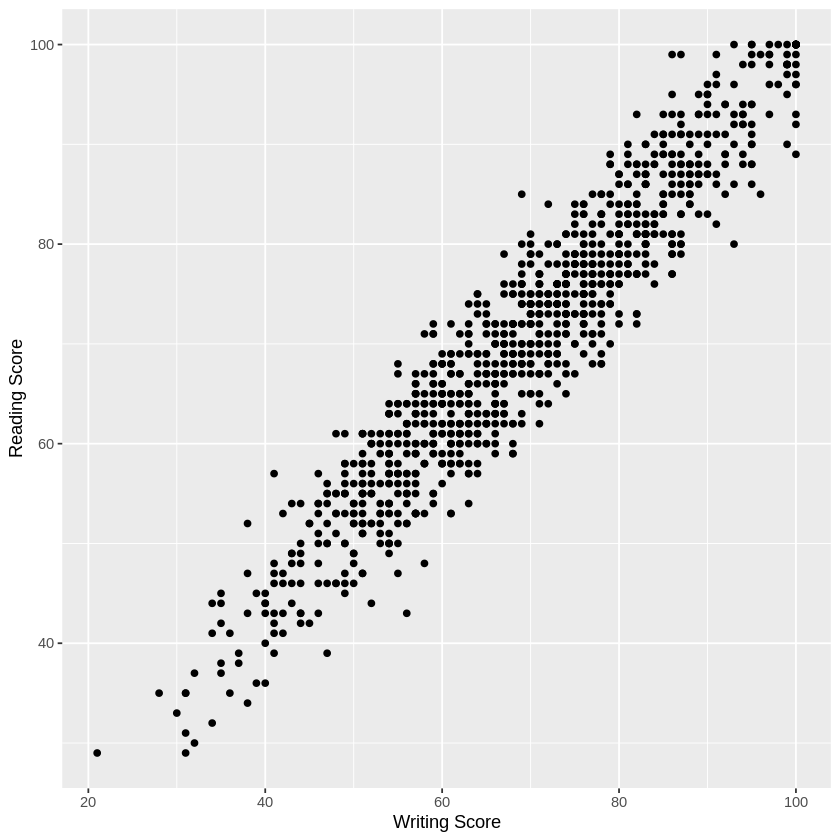

In [51]:
exam_graph1 <- exam_data1 |> 
  ggplot(aes(x = writing_score, y = reading_score)) +
  geom_point() +
  xlab("Writing Score") +
  ylab("Reading Score") 
exam_graph1

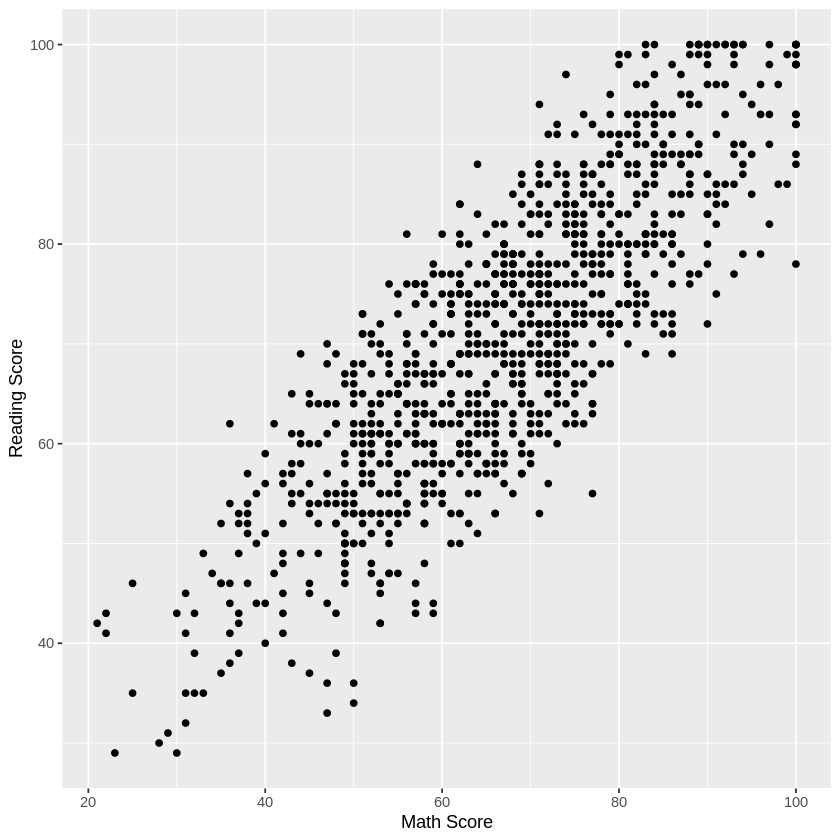

In [52]:
exam_graph2 <- exam_data1 |> 
  ggplot(aes(x = math_score, y = reading_score)) +
  geom_point() +
  xlab("Math Score") +
  ylab("Reading Score") 
exam_graph2

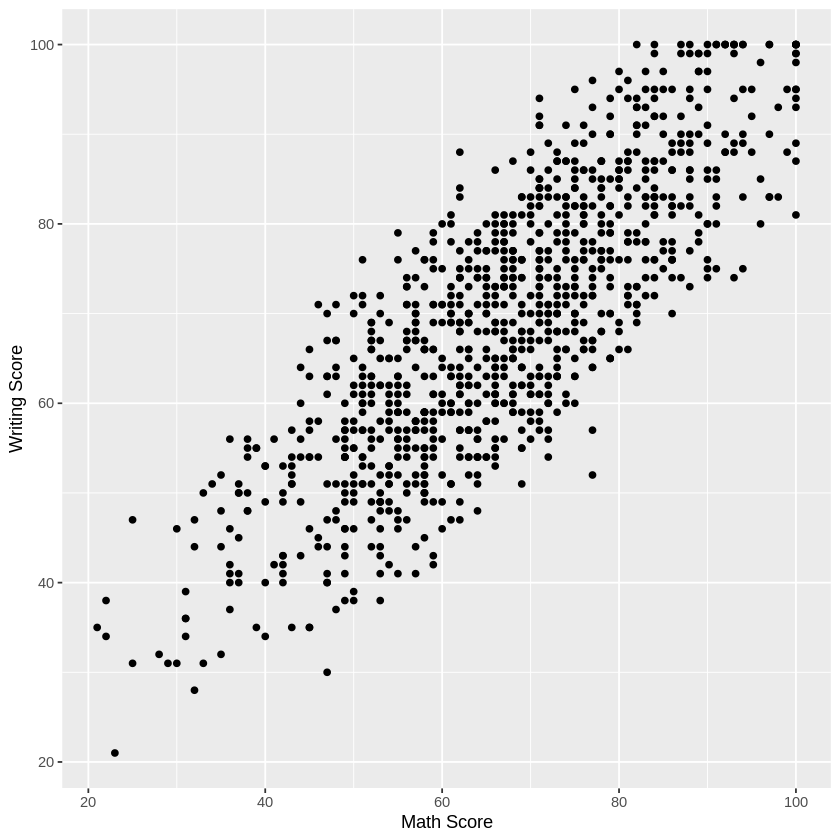

In [61]:
exam_graph3 <- exam_data1 |> 
  ggplot(aes(x = math_score, y = writing_score)) +
  geom_point() +
  xlab("Math Score") +
  ylab("Writing Score") 
exam_graph3

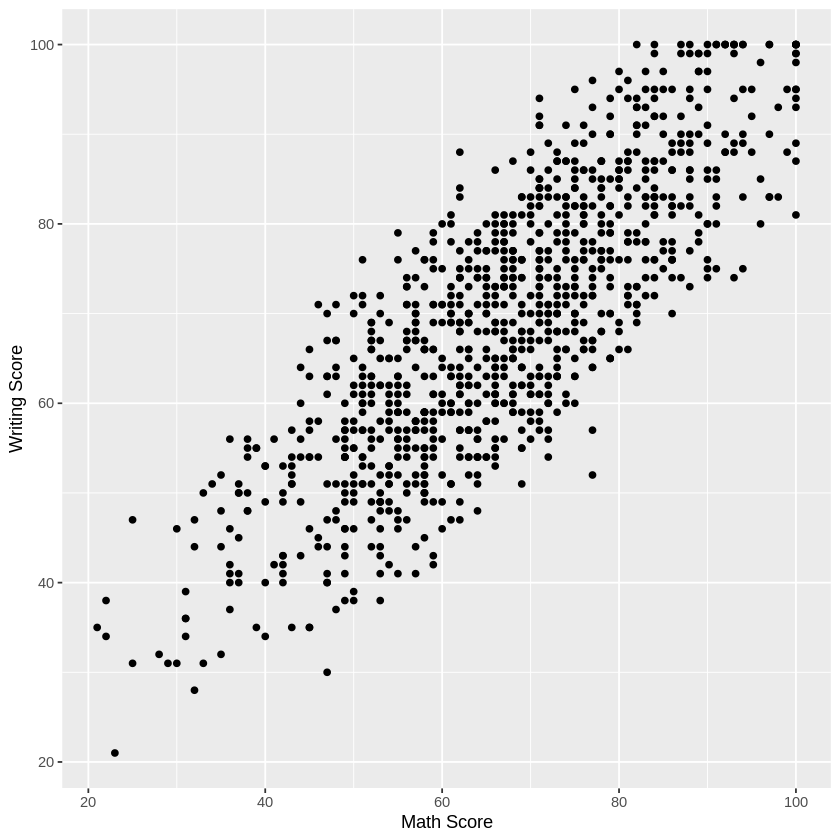

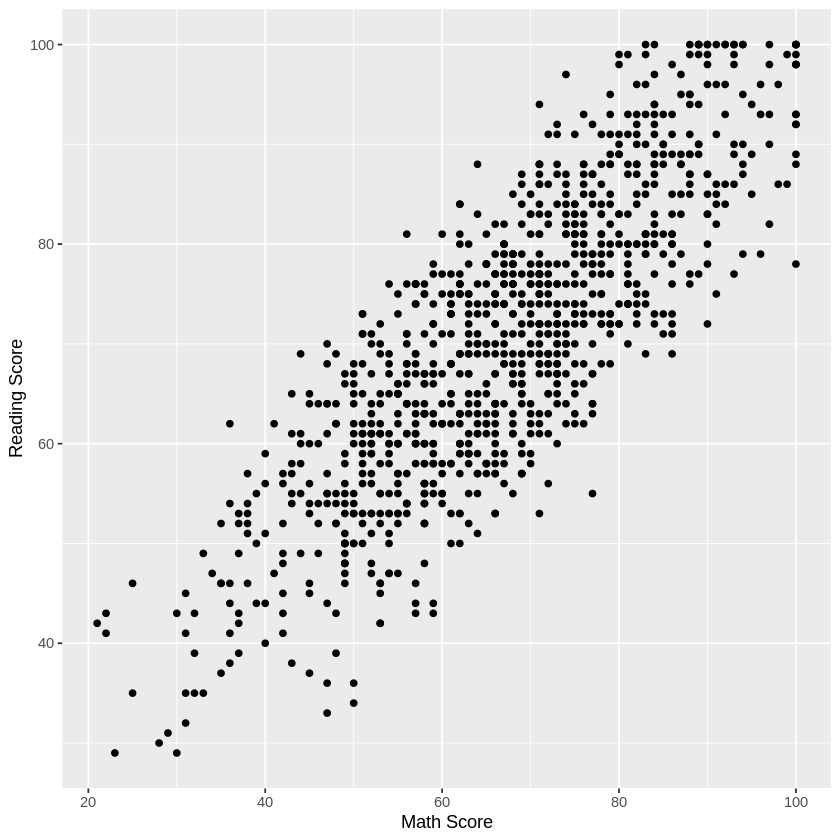

In [67]:
par(mfrow = c(1,2))
ggplot(exam_data1, aes(x = math_score, y = writing_score)) +
  geom_point() +
  xlab("Math Score") +
  ylab("Writing Score")
ggplot(exam_data1, aes(x = math_score, y = reading_score)) +
  geom_point() +
  xlab("Math Score") +
  ylab("Reading Score") 